# From raw XYZ to clean selected data --- Selecting columns to work

### After areal survey, the geoscientist have to treat the data collected and save it to a organized database. So here, we'll learn how to use some functions of the GeoDataProcessing Python Libraries.

##### The first thing that we have to do is to learn what are theese libraries and which of them we'll use.

### Importing the libraries
##### numpy https://numpy.org/doc/stable/user/quickstart.html#

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj

import verde as vd
import pooch

In [2]:
plt.rcParams['figure.dpi'] = 120

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###      Selecting columns to work

####    Here we'll use the gama and location data.
    
####    The location columns will be metadata and the gama will be the features.
    
####    This is much a manual process that depends on the type of organization that the mining company used to create the XYZ files. 

####    So we'll use a funtion called pandas.read_csv('  ') to:
    
######    1- load the xyz file delivered by the mining company to the RAM as a dataframe;
######    2- and select the columns to work;

In [3]:
g1039cols = 'X Y LONG LAT MAGR THC UC KC CTC MAGB MAGC MAGD THB UB KB CTB FIDU TEMP ALTE ALTB'.split(' ')
g1039 = pd.read_csv('../database/xyz/spaulo_rjaneiro_sp.xyz',
                   names = g1039cols,
                   delim_whitespace = True,
                   skiprows = 6,
                   usecols = ["X","Y","LONG","LAT",
                              "THC","UC","KC","CTC",
                             'MAGR'])

g1105_cols = 'KB DATA BARO UB THB COSMICO CTB UUP ALTURA KPERC eU eTh CTEXP UTHRAZAO X Y UKRAZAO MDT THKRAZAO LIVE_TIME CTC KC THC UC HORA GPSALT LAT FIDUCIAL TEMP LONG'.split(' ')
g1105 = pd.read_csv('../database/xyz/gama/1105_GamaLine.XYZ',
                    names = g1105_cols,
                    delim_whitespace = True,
                    skiprows = 11,
                    usecols = ["X","Y","LONG","LAT",
                               'THC','UC','KC',"CTC",
                              'MDT'])

gArea14_cols = 'ALTURA BARO COSMICO CTB CTC CTEXP DATA eTh eU FIDUCIAL GPSALT HORA KB KC KPERC LAT LIVE_TIME LONG MDT TEMP THB THC THKRAZAO UB UC UKRAZAO UTHRAZAO UUP X X_WGS Y Y_WGS'.split(' ')
gArea14 = pd.read_csv('../database/xyz/gama/Area_14_gama.XYZ',
                    names = gArea14_cols,
                    delim_whitespace = True,
                    skiprows = 8,
                    usecols = ["X","Y","LAT","LONG","X_WGS","Y_WGS",
                               "KPERC","eU","eTh",
                               'THC','UC','KC',"CTC",
                               "MDT"])



FileNotFoundError: [Errno 2] No such file or directory: '../database/xyz/spaulo_rjaneiro_sp.xyz'

### Then we use a funciton called dataframe.dropna() to delete the noData values from the dataframe.

In [ ]:
g1039.dropna(inplace=False)
g1105.dropna(inplace=False)
gArea14.dropna(inplace=False)

### Now we can save the dataframe to a organized database as csv file.

#### The function is pandas.to_csv()

In [ ]:
g1039.to_csv('../database/csv/gama/g1039_df.csv')
g1105.to_csv('../database/csv/gama/g1105_df.csv')
gArea14.to_csv('../database/csv/gama/gArea14_df.csv')

### Here we can plot the values to visualize the area of the survey and observe that the CT values of the surveys is too different.

In [ ]:
plt.figure()
plt.scatter(g1039.LONG, g1039.LAT,
            c= g1039.CTC,
            s=2)
plt.colorbar()
plt.axis('scaled')

<IPython.core.display.Javascript object>


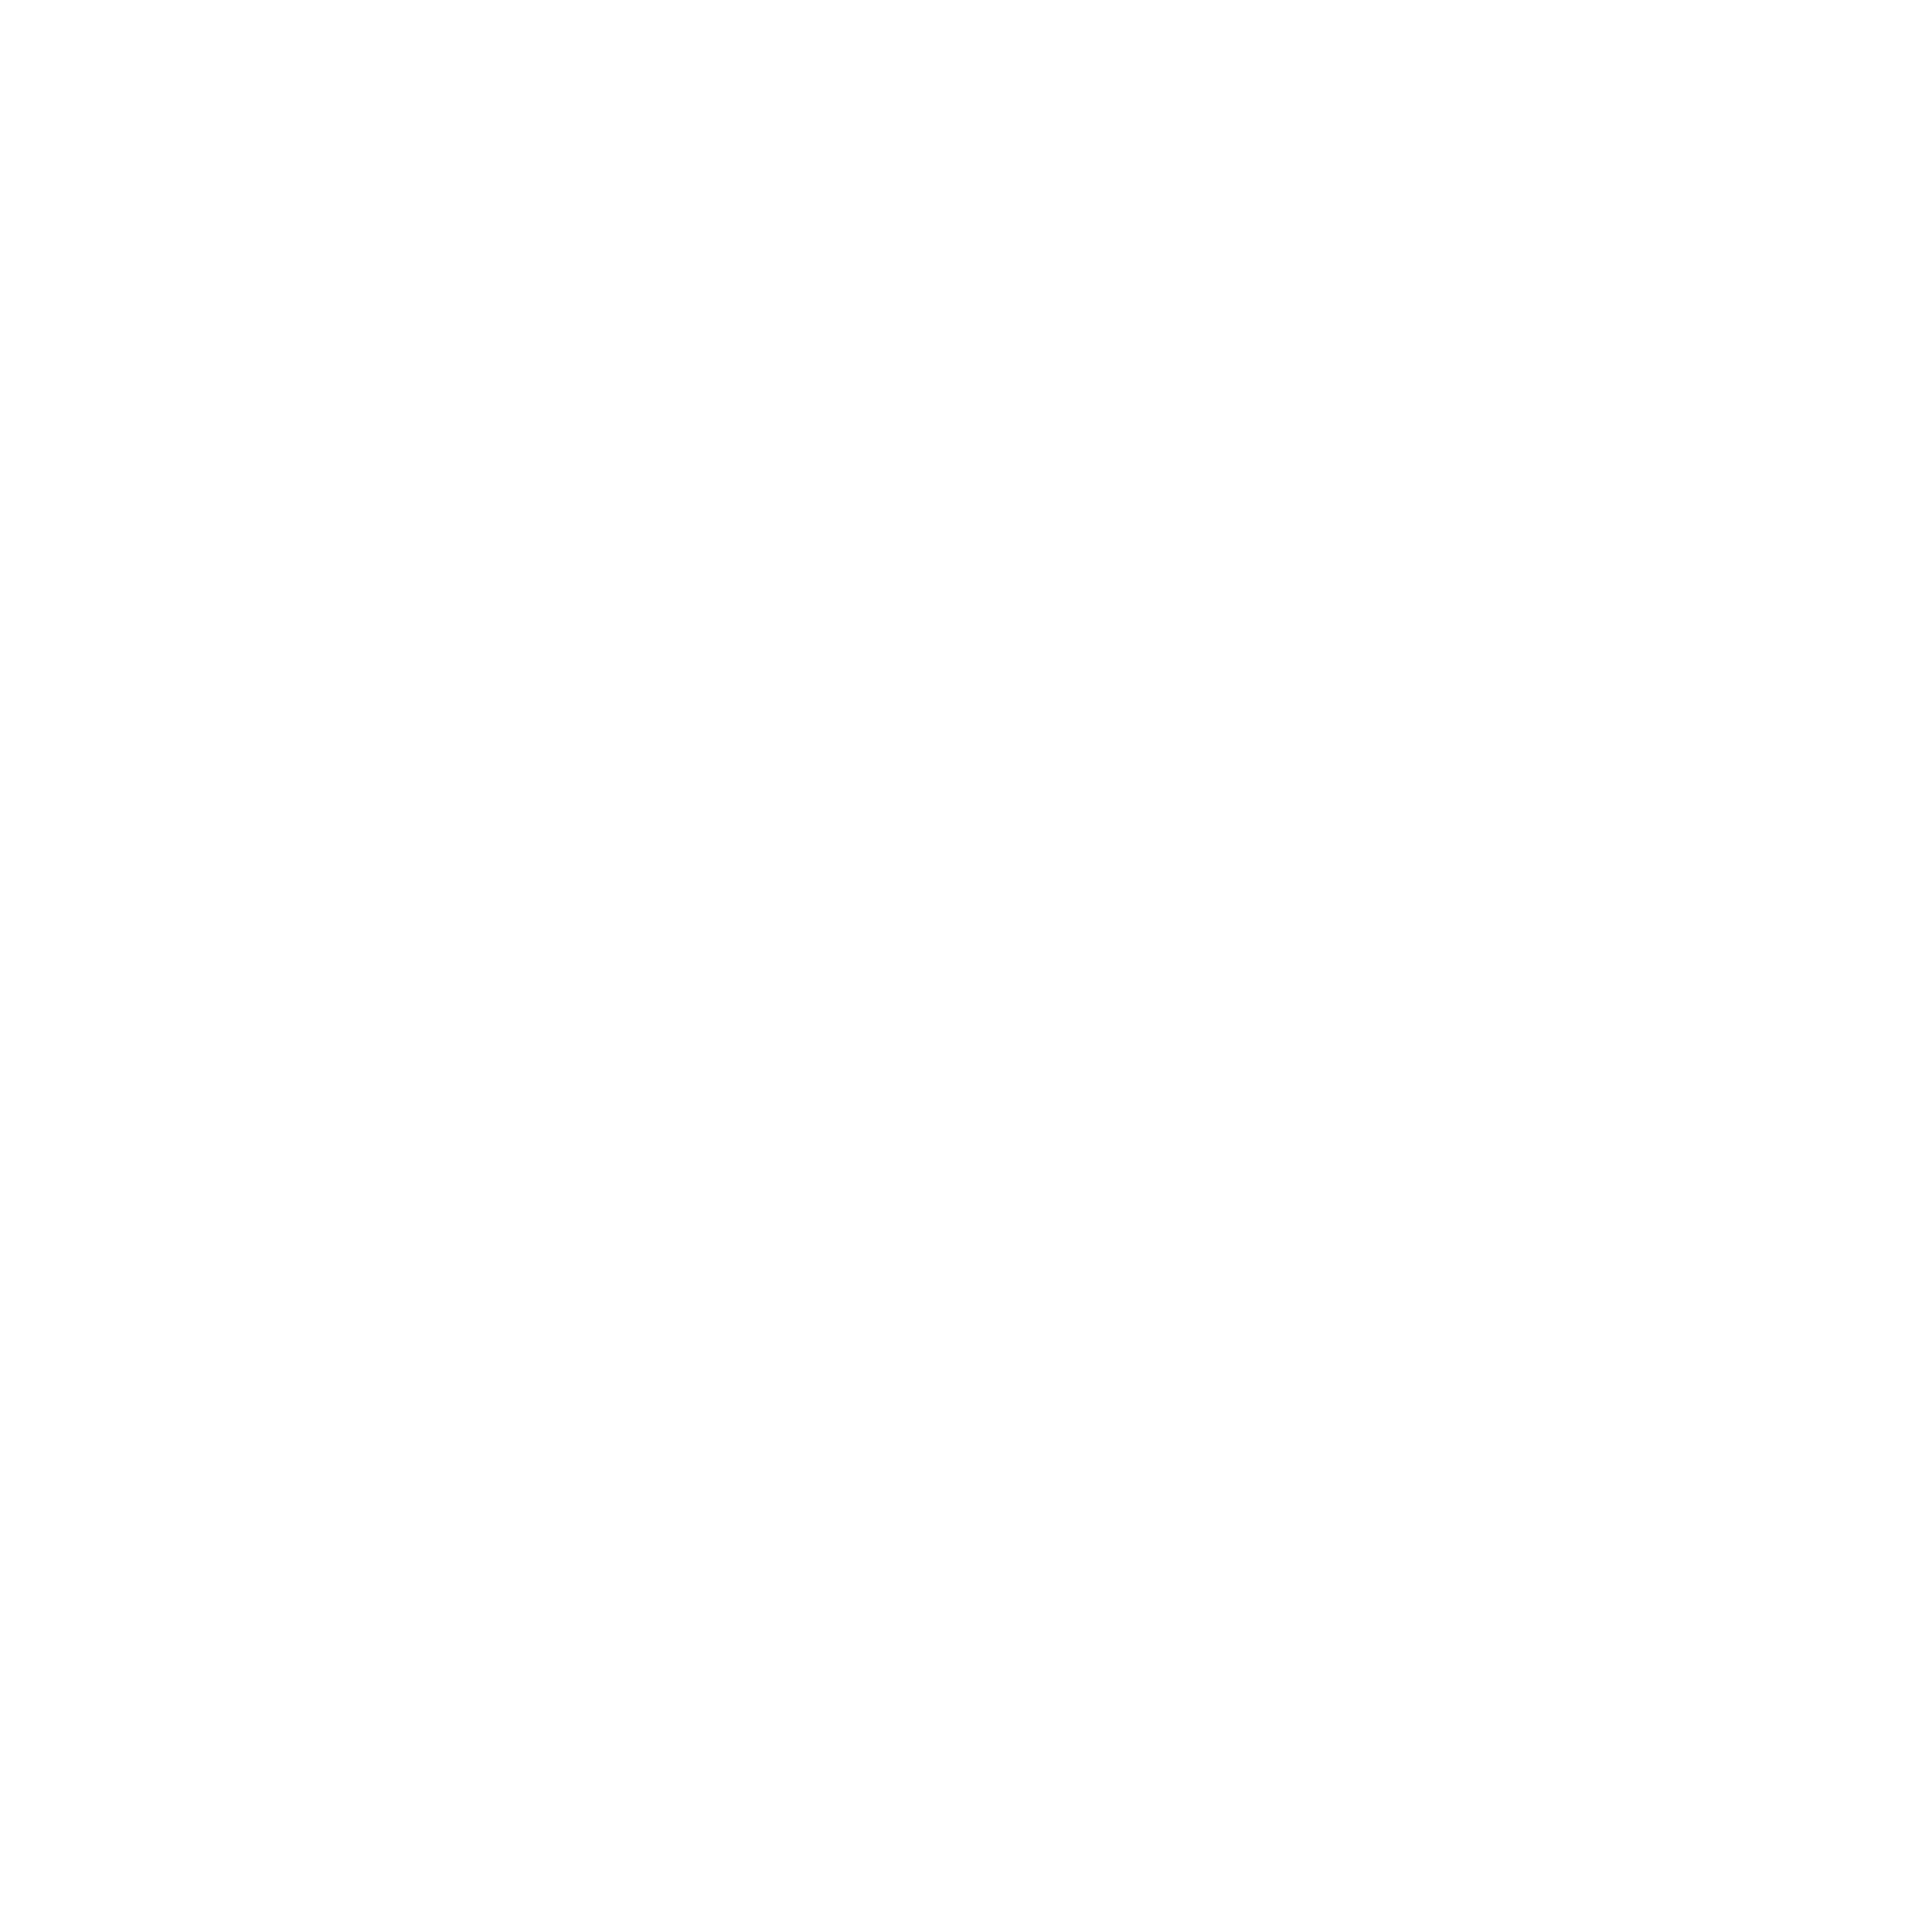

NameError: name 'g1105' is not defined

In [4]:
plt.figure(figsize=(15,15))
plt.scatter(g1105.LONG, g1105.LAT,
            c= g1105.CTC,
            s=2)
plt.colorbar()
plt.axis('scaled')

### Here we can use a function from Verde Library to select a region to observer a specific location.

### I selected the area that cotains the Nappe Socorro geological mapping area made by (Freitas 2006)

In [5]:
scrr_1039 = g1039[vd.inside((g1039.LONG,g1039.LAT), region = [-47.5, -46.4,
                                                               -23.5, -22])]

scrr_1105 = g1105[vd.inside((g1105.LONG,g1105.LAT), region = [-46.8, -45.9,
                                                             -23.1, -22.2])]

NameError: name 'g1039' is not defined

<IPython.core.display.Javascript object>


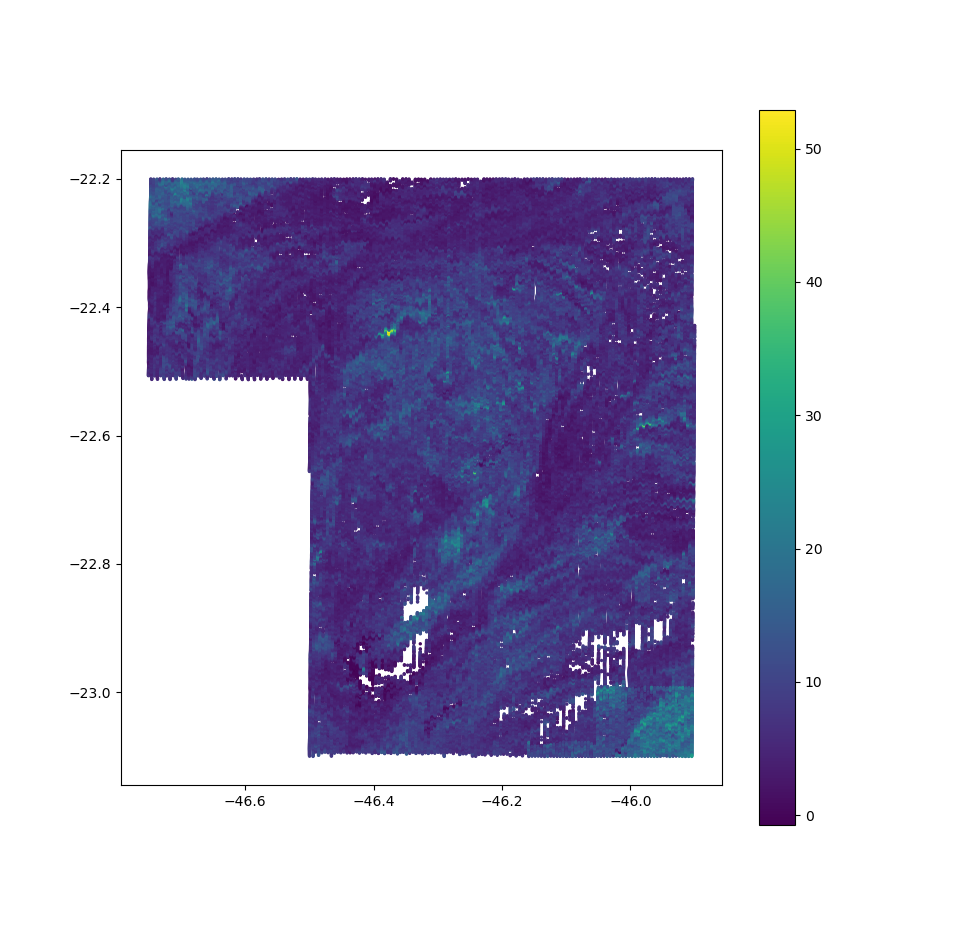

(-46.7934064, -45.8574736, -23.14499885, -22.155002149999998)

In [33]:
plt.figure(figsize=(15,15))
plt.scatter(scrr_1105.LONG, scrr_1105.LAT,
            c=scrr_1105.CTC,
            s=2)
plt.colorbar()
plt.axis('scaled')

<IPython.core.display.Javascript object>


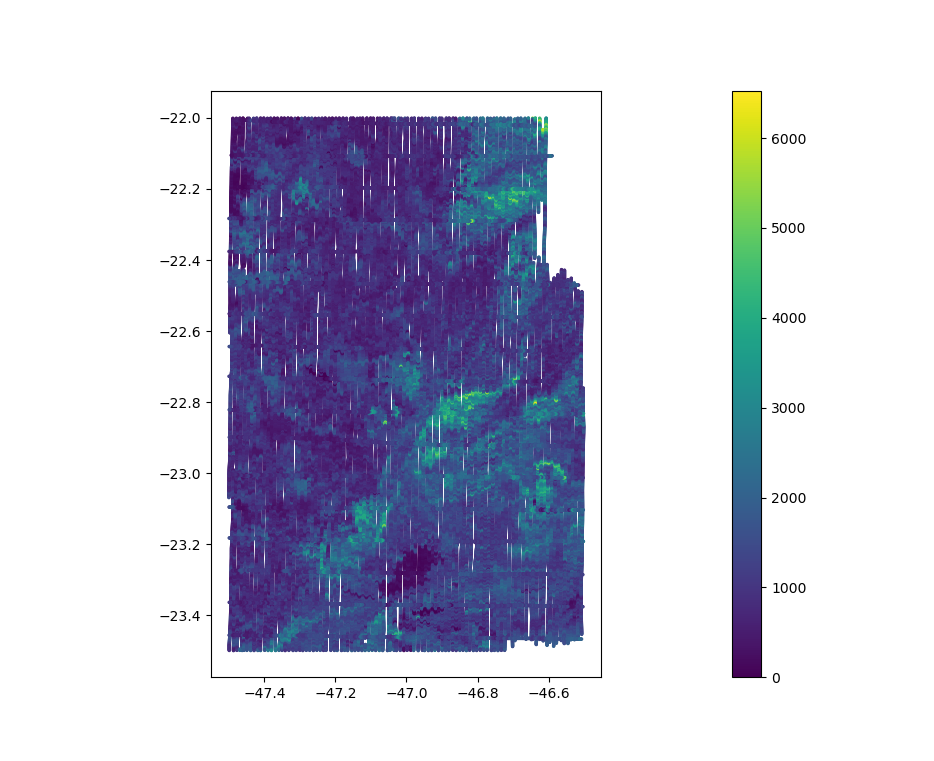

(-47.54994735, -46.45110565000001, -23.575, -21.925)

In [34]:
plt.figure()
plt.scatter(scrr_1039.LONG, scrr_1039.LAT,
            c=scrr_1039.CTC,
            s=2)
plt.colorbar()
plt.axis('scaled')

In [38]:
scrr_1039.head(100)

/home/grl/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,X,Y,LONG,LAT,MAGR,THC,UC,KC,CTC
296211,243279.,7497977.0,-47.497177,-22.605408,113.40,78.97,28.26,10.75,1214.07
296212,243277.,7498075.0,-47.497177,-22.604523,111.35,77.53,18.51,32.60,1188.08
296213,243275.,7498174.0,-47.497192,-22.603622,108.29,77.11,0.00,74.30,1269.47
296214,243272.,7498272.0,-47.497192,-22.602737,105.23,74.49,0.54,15.39,1265.21
296215,243270.,7498370.0,-47.497192,-22.601852,97.17,56.10,6.14,33.21,1090.33
...,...,...,...,...,...,...,...,...,...
296306,243237.,7507375.0,-47.496048,-22.520584,-37.05,20.03,9.09,0.00,354.57
296307,243235.,7507476.0,-47.496063,-22.519669,19.90,20.06,5.62,23.13,419.66
296308,243233.,7507577.0,-47.496063,-22.518753,55.84,31.79,0.00,1.67,415.66
296309,243231.,7507678.0,-47.496063,-22.517853,67.78,37.56,1.32,0.00,461.70


In [37]:
scrr_1105.head(100)

/home/grl/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,X,Y,MDT,CTC,KC,THC,UC,LAT,LONG
24642,319891.04,7543964.40,870.93,8.067,1.717,18.150,2.089,-22.200301,-46.747159
24643,319892.13,7543883.68,874.76,7.944,1.390,20.150,1.832,-22.201030,-46.747158
24644,319893.57,7543803.53,879.92,8.390,1.641,19.629,1.679,-22.201754,-46.747152
24645,319895.33,7543723.93,884.81,8.914,1.996,17.489,1.906,-22.202473,-46.747144
24646,319897.38,7543644.85,889.67,9.213,1.977,18.621,1.974,-22.203188,-46.747133
...,...,...,...,...,...,...,...,...,...
24737,319882.14,7536306.33,749.47,9.880,1.494,22.729,2.624,-22.269453,-46.748103
24738,319883.39,7536218.91,748.79,9.709,1.419,21.437,3.182,-22.270243,-46.748101
24739,319884.99,7536131.24,745.76,9.014,1.187,21.174,2.854,-22.271035,-46.748095
24740,319886.55,7536043.27,739.19,8.497,1.553,18.682,2.095,-22.271829,-46.748090


In [24]:
frames = [scrr_1105, scrr_1039]
socorro = pd.concat(frames)
socorro

/home/grl/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,X,Y,MDT,CTC,KC,THC,UC,LAT,LONG,MAGR
24642,319891,7543964.40,870.93,8.067,1.717,18.150,2.089,-22.200301,-46.747159,NaN
24643,319892,7543883.68,874.76,7.944,1.390,20.150,1.832,-22.201030,-46.747158,NaN
24644,319894,7543803.53,879.92,8.390,1.641,19.629,1.679,-22.201754,-46.747152,NaN
24645,319895,7543723.93,884.81,8.914,1.996,17.489,1.906,-22.202473,-46.747144,NaN
24646,319897,7543644.85,889.67,9.213,1.977,18.621,1.974,-22.203188,-46.747133,NaN
...,...,...,...,...,...,...,...,...,...,...
539897,329329.,7563776.00,NaN,2177.980,245.360,70.130,20.860,-22.022064,-46.653473,92.53
539898,329426.,7563774.00,NaN,2144.920,279.660,54.540,19.790,-22.022095,-46.652527,100.51
539899,329523.,7563771.00,NaN,2081.990,236.940,74.220,19.750,-22.022125,-46.651596,100.50
539900,329620.,7563769.00,NaN,1978.740,235.280,68.610,5.810,-22.022156,-46.650650,96.48


### This plot shows that the 1105_gama.CTCOR is diferent from 1039_gama.CTC in some way

/home/grl/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


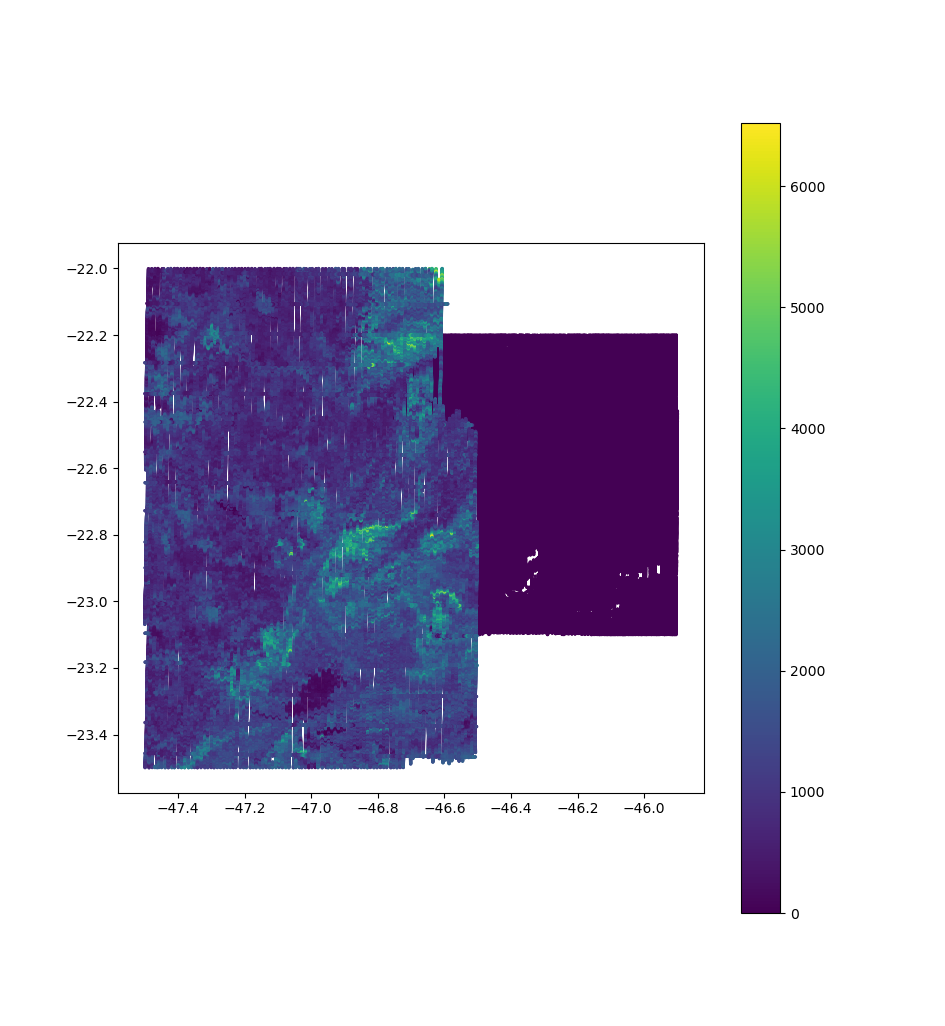

In [50]:
plt.figure(figsize=(15,15))
plt.scatter(socorro.LONG, socorro.LAT,
            c=socorro.CTC,
            s=2)
plt.axis('scaled')
plt.colorbar()

In [16]:
socorro.to_csv('../database/csv/socorro.csv')

#### Now that we have a clean dataframe, only heading, values and a area selected, we can manipulate the data to generate better information.
#### So we transform the location metadata to a unified geometry column called 'coordinates' or 'geometry'. And plotting this points to a cartesian or projected coordinated system we can visualize how well was the aerial survey was made.

### Projections

### lat_ts (latitude of the true scalle ) = the mean value of the LAT of the survey

In [ ]:
projection = pyproj.Proj(proj='merc', lat_ts=scrr_1039.LAT.mean())

In [ ]:
coordinates = projection(scrr_1039.LONG.values, scrr_1039.LAT.values)
coordinates

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(coordinates[0],coordinates[1],
           c=scrr_1039.MAGR, s=0.1)
plt.axis('scaled')
plt.colorbar()

## Now we have to create a regular grid, decimating the data reducing the alliasing effect by a fuction called reduce.

In [ ]:
reducer = vd.BlockReduce(np.median, spacing=1000)

In [ ]:
b_coords, b_MAGR = reducer.filter(coordinates, scrr_1039.MAGR)

#b_THC, b_UC, b_KC,b_CTC = reducer.filter(coordinates, scrr_1039.THC, scrr_1039.UC, scrr_1039.KC, scrr_1039.CTC)


In [ ]:
b_coords

In [ ]:
b_MAGR.shape

###  Here we visualize the residual points after the blocked reductionm and observe that the sampled points are not perfect

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(b_coords[0],b_coords[1],
            c    = b_MAGR,
            cmap = 'magma',
            s    = 2)
plt.axis('scaled')
plt.colorbar()

In [ ]:
b_MAGR.shape

In [ ]:
scrr_1039.shape

### Gridding with splines

In [ ]:
spline = vd.Spline()

In [ ]:
spline.fit(b_coords, b_MAGR)

###  Predicting the real non decimated data

In [ ]:
predicted = spline.predict(coordinates)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(coordinates[0],coordinates[1],
            c=predicted,
            cmap='magma',
            s=0.1)
plt.axis('scaled')
plt.colorbar()

In [ ]:
residuals = scrr_1039.MAGR - predicted

In [ ]:
scale = vd.maxabs(residuals)

plt.figure(figsize=(10,10))
plt.scatter(coordinates[0],coordinates[1],
            c=residuals,
            cmap='RdBu_r',
            s=2,
            vmin=-scale,vmax=scale)
plt.axis('scaled')
plt.colorbar()

###  Now generating a pixel data from point data

In [ ]:
region = vd.get_region(coordinates)
grid_coords = vd.grid_coordinates(region, spacing = 500)

# This griding resolution is 10x the real data resolution (1000m)

In [ ]:
grid_coords

In [ ]:
grid_MAGR = spline.predict(grid_coords)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(grid_coords[0], grid_coords[1],
            c=grid_MAGR,
            cmap='magma')
plt.axis('scaled')
plt.colorbar()

In [ ]:
grid = spline.grid(spacing=500, data_names=['MAGR'])
grid

In [ ]:
grid.MAGR.plot(figsize=(10,10),
               cmap='magma')
plt.axis('scaled')

### Eliminating pixels that is too fars from a real surveyed value

In [ ]:
grid = vd.distance_mask(coordinates, maxdist=2000, grid=grid)
grid

In [ ]:
grid.MAGR.plot(figsize=(15,15),
              cmap='magma')
plt.axis('scaled')

###  Working with cartesian coordinate system

In [ ]:
grid_latlon = spline.grid(
    region  = vd.get_region((scrr_1039.LONG, scrr_1039.LAT)),
    spacing = 0.25 / 60,
    projection = projection,
    data_names = ['MAGR'],
    dims    = ('latitude','longitude')
)

In [ ]:
grid_latlon

In [ ]:
grid_latlon.MAGR.plot(figsize=(10,10),
                     cmap='magma')
plt.axis('scaled')

##  Chanining operations

###  First we create the chain

In [ ]:
chain_MAGR = vd.Chain([
    ('trend',  vd.Trend(degree=2)),
    ('reduce', vd.BlockReduce(np.median, spacing=1000)),
    ('spline', vd.Spline()),
])

In [ ]:
chain_MAGR

### Then we fit within the chain

In [ ]:
chain_MAGR.fit(coordinates, scrr_1039.MAGR)

In [ ]:
MAGR_grid = chain_MAGR.grid(spacing=500, data_names=['MAGR'])

In [ ]:
MAGR_grid = vd.distance_mask(coordinates, maxdist=1000, grid=MAGR_grid)


In [ ]:
MAGR_grid.MAGR.plot(figsize=(10,10), cmap='magma')
plt.axis('scaled')

### Model Validation

In [ ]:
train, test = vd.train_test_split(coordinates, scrr_1039.MAGR,
                                 test_size = 0.1)

#### Here we can visualize the train information:
    1- two arrays representing coordinates;
    2- a touple of one array of data training set
    3- a column representing the wheights of the dataset

In [ ]:
train

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(train[0][0], train[0][1], '.b', markersize=1)
plt.plot(test[0][0], test[0][1], '.r', markersize=1)
plt.axis('scaled')

In [ ]:
chain_MAGR.fit(*train)
# *train   ---> chain.fit(train[0], train[1])

In [ ]:
chain_MAGR.score(*test)

In [ ]:
train, test = vd.train_test_split(coordinates, scrr_1039.MAGR, test_size=0.1, spacing=1000)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(train[0][0], train[0][1], '.b', markersize=1)
plt.plot(test[0][0], test[0][1], '.r', markersize=1)
plt.axis('scaled')

In [ ]:
chain_MAGR.fit(*train)

In [ ]:
chain_MAGR.score(*test)

###  Cross-Validation

In [ ]:
cv     = vd.BlockKFold(spacing=1000,
                  n_splits=10,
                  shuffle=True)
scores = vd.cross_val_score(chain_MAGR,
                            coordinates,
                            scrr_1039.MAGR,
                            cv=cv)

In [ ]:
scores

In [ ]:
plt.figure()
plt.hist(scores, bins ='auto')

### Now reproducing this fit process for each feature.
It is possible to create a chainned operation with a higher degree trend to interpolate more then 2 dimentions "coordinates x Feature"

In [ ]:
chain_CTC = vd.Chain([
    ('trend',  vd.Trend(degree=2)),
    ('reduce', vd.BlockReduce(np.median, spacing=1000)),
    ('spline', vd.Spline()),
])

chain_CTC.fit(coordinates, scrr_1039.CTC)

CTC_grid = chain_CTC.grid(spacing=500, data_names=['CTC'])
CTC_grid = vd.distance_mask(coordinates, maxdist=1000, grid=CTC_grid)

CTC_grid.CTC.plot(figsize=(10,10), cmap='RdBu')
plt.axis('scaled')

In [ ]:
chain_KC = vd.Chain([
    ('trend',  vd.Trend(degree=2)),
    ('reduce', vd.BlockReduce(np.median, spacing=1000)),
    ('spline', vd.Spline()),
])

chain_KC.fit(coordinates, scrr_1039.KC)

KC_grid = chain_KC.grid(spacing=500, data_names=['KC'])
KC_grid = vd.distance_mask(coordinates, maxdist=1000, grid=KC_grid)

In [ ]:
chain_THC = vd.Chain([
    ('trend',  vd.Trend(degree=2)),
    ('reduce', vd.BlockReduce(np.median, spacing=1000)),
    ('spline', vd.Spline()),
])

chain_THC.fit(coordinates, scrr_1039.THC)

THC_grid = chain_THC.grid(spacing=500, data_names=['THC'])
THC_grid = vd.distance_mask(coordinates, maxdist=1000, grid=THC_grid)

In [ ]:
chain_UC = vd.Chain([
    ('trend',  vd.Trend(degree=2)),
    ('reduce', vd.BlockReduce(np.median, spacing=1000)),
    ('spline', vd.Spline()),
])

chain_UC.fit(coordinates, scrr_1039.UC)

UC_grid = chain_UC.grid(spacing=500, data_names=['UC'])
UC_grid = vd.distance_mask(coordinates, maxdist=1000, grid=UC_grid)

### Now Ploting the grids

In [ ]:
CTC_grid.CTC.plot(figsize=(10,10), cmap='viridis',
                 vmin=0, vmax=5000)
plt.axis('scaled')

In [ ]:
#KC_scale = vd.maxabs(KC_grid.KC)

KC_grid.KC.plot(figsize=(10,10), cmap='viridis',
               vmin=0, vmax=300)
plt.axis('scaled')

In [ ]:
THC_grid.THC.plot(figsize=(10,10), cmap='viridis',
                 vmin=0, vmax=250)
plt.axis('scaled')

In [ ]:
UC_grid.UC.plot(figsize=(10,10), cmap='viridis',
               vmin=0, vmax=55)
plt.axis('scaled')

### Saving the grid to a organized database

In [ ]:
MAGR_grid.to_netcdf('../database/grid/scrr_MAGR.nc')
CTC_grid.to_netcdf('../database/grid/scrr_CTC.nc')
UC_grid.to_netcdf('../database/grid/scrr_UC.nc')
THC_grid.to_netcdf('../database/grid/scrr_THC.nc')
KC_grid.to_netcdf('../database/grid/scrr_KC.nc')